C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_10700\1292759258.py:29: RuntimeWarning: overflow encountered in scalar divide
  uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_10700\1292759258.py:30: RuntimeWarning: invalid value encountered in scalar add
  ut = self.u[i, j] + alpha * uxx
C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_10700\1292759258.py:29: RuntimeWarning: invalid value encountered in scalar add
  uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2


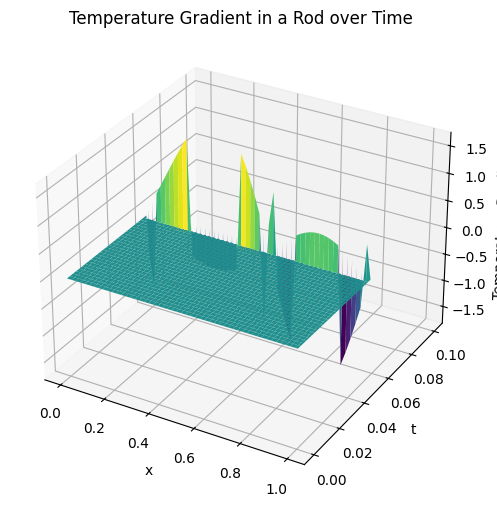

In [4]:
#Solving a differential equation using a standard explicit scheme
#by rewriting the equation to an interpretable form using the Euler's Forward Equation:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolver:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt+1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

    def solve(self):
        alpha = self.dt / (self.dx**2)
        for j in range(0, self.Nt):
            for i in range(1, self.Nx-1):
                uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
                ut = self.u[i, j] + alpha * uxx
                self.u[i, j+1] = ut * self.dt

            # Enforce boundary conditions
            self.u[0, j+1] = 0
            self.u[-1, j+1] = 0

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt+1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

# Usage
solver = HeatEquationSolver(L=1.0, T=0.1, Nx=100, Nt=1000)
solver.solve()
solver.plot_solution()

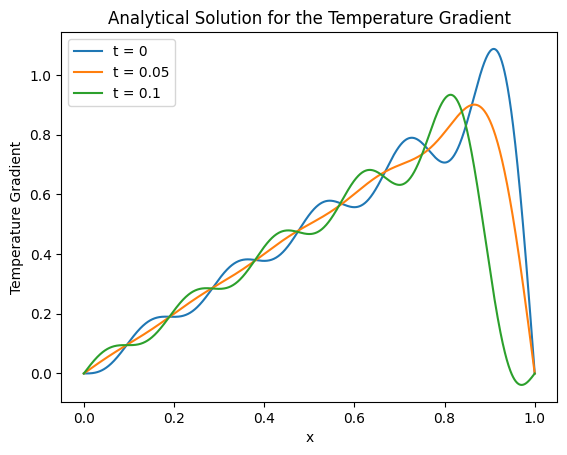

In [2]:
#The analytical solution using the Forward Euler's Method:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the coefficients A_n, C_n, and D_n
def compute_coefficients(n, L):
    A_n = 2 / (n * np.pi) * (-1)**(n + 1)
    C_n = 1  # Assuming an arbitrary constant for simplicity
    D_n = np.sin(n * np.pi * 0)  # Initial condition u(x, 0) = sin(pi * x)

    return A_n, C_n, D_n

# Function to compute the analytical solution for u(x, t)
def analytical_solution(x, t, N, L):
    u = 0
    for n in range(1, N+1):
        A_n, C_n, D_n = compute_coefficients(n, L)
        u += A_n * np.sin(n * np.pi * x) * (C_n * np.cos(n * np.pi * t) + D_n * np.sin(n * np.pi * t))

    return u

# Parameters
L = 1.0
N = 10  # Number of terms in the series
x_values = np.linspace(0, L, 1000)
t_values = [0, 0.05, 0.1]  # Time instances to plot

# Plot the analytical solution at different time instances
for t in t_values:
    u_values = analytical_solution(x_values, t, N, L)
    plt.plot(x_values, u_values, label=f't = {t}')

plt.xlabel('x')
plt.ylabel('Temperature Gradient')
plt.title('Analytical Solution for the Temperature Gradient')
plt.legend()
plt.show()

C:\Users\Kjæreng\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


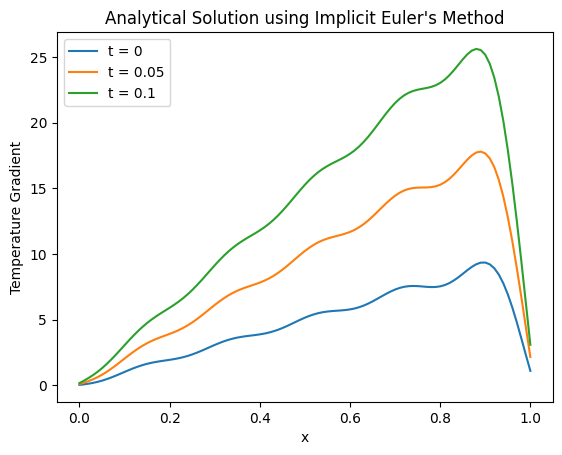

In [4]:
#Finding the analytical solution using the Implicit Euler's Method: 
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags

class TemperatureSolver:
    def __init__(self, L, N, delta_t, delta_x):
        self.L = L
        self.N = N
        self.delta_t = delta_t
        self.delta_x = delta_x

        # Initialize coefficients
        self.A_n, self.C_n, self.D_n = self.compute_coefficients()

        # Initialize A matrix for implicit method
        self.alpha = delta_t / (delta_x**2)
        self.x_values = np.linspace(0, L, int(L / delta_x) + 1)
        self.A_matrix = diags([1 + 2*self.alpha, -self.alpha, -self.alpha], [0, -1, 1],
                              shape=(len(self.x_values), len(self.x_values))).toarray()

    def compute_coefficients(self):
        A_n = [2 / (n * np.pi) * (-1)**(n + 1) for n in range(1, self.N + 1)]
        C_n = 1  # Assuming an arbitrary constant for simplicity
        D_n = [np.sin(n * np.pi * 0) for n in range(1, self.N + 1)]  # Initial condition u(x, 0) = sin(pi * x)

        return A_n, C_n, D_n

    def implicit_euler_solution(self, u):
        b_vector = u + self.alpha * sum(A * np.sin(n * np.pi * self.x_values) for A, n in zip(self.A_n, range(1, self.N + 1)))
        return spsolve(self.A_matrix, b_vector)

    def solve_temperature(self, t_values):
        u_values = np.zeros((len(self.x_values), len(t_values)))

        for i, t in enumerate(t_values):
            u_values[:, i] = self.implicit_euler_solution(u_values[:, i - 1] if i > 0 else np.zeros_like(self.x_values))

        return u_values

    def plot_solution(self, x_values, t_values, u_values):
        for i, t in enumerate(t_values):
            plt.plot(x_values, u_values[:, i], label=f't = {t}')

        plt.xlabel('x')
        plt.ylabel('Temperature Gradient')
        plt.title('Analytical Solution using Implicit Euler\'s Method')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    L = 1.0
    N = 10
    delta_t = 0.001
    delta_x = 0.01  # Example value, adjust as needed

    solver = TemperatureSolver(L, N, delta_t, delta_x)
    t_values = [0, 0.05, 0.1]
    u_values = solver.solve_temperature(t_values)

    solver.plot_solution(solver.x_values, t_values, u_values)

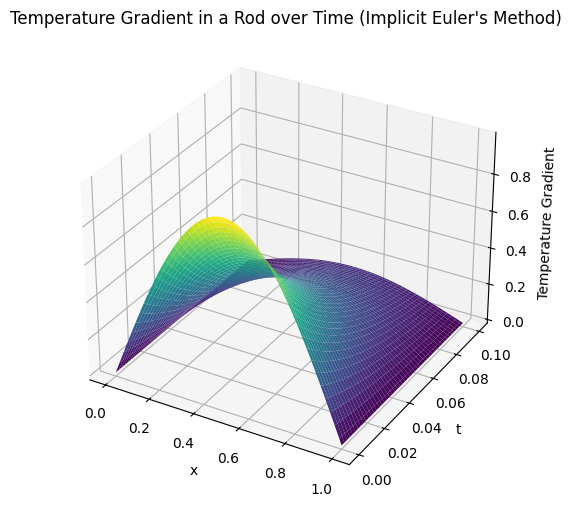

In [2]:
#Solving a differential equation using a standard explicit scheme
#by making the equation interpretable to the Neural Network by way of the Implicit Euler's Method:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolverImplicit:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt + 1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

    def solve(self):
        alpha = self.dt / (self.dx**2)

        for j in range(0, self.Nt):
            A_matrix = self.construct_A_matrix(alpha)
            b_vector = self.construct_b_vector(j, alpha)
            self.u[1:-1, j + 1] = np.linalg.solve(A_matrix, b_vector)

        # Enforce boundary conditions
        self.u[0, :] = 0
        self.u[-1, :] = 0

    def construct_A_matrix(self, alpha):
        main_diagonal = 1 + 2 * alpha
        off_diagonal = -alpha

        A_matrix = np.diag(main_diagonal * np.ones(self.Nx - 2)) + np.diag(off_diagonal * np.ones(self.Nx - 3), 1) + np.diag(off_diagonal * np.ones(self.Nx - 3), -1)

        return A_matrix

    def construct_b_vector(self, j, alpha):
        b_vector = self.u[1:-1, j] + alpha * (self.u[2:, j] - 2 * self.u[1:-1, j] + self.u[:-2, j])
        b_vector[0] += alpha * self.u[0, j]
        b_vector[-1] += alpha * self.u[-1, j]

        return b_vector

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt + 1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title("Temperature Gradient in a Rod over Time (Implicit Euler's Method)")
        plt.show()

# Usage
solver = HeatEquationSolverImplicit(L=1.0, T=0.1, Nx=100, Nt=1000)
solver.solve()
solver.plot_solution()

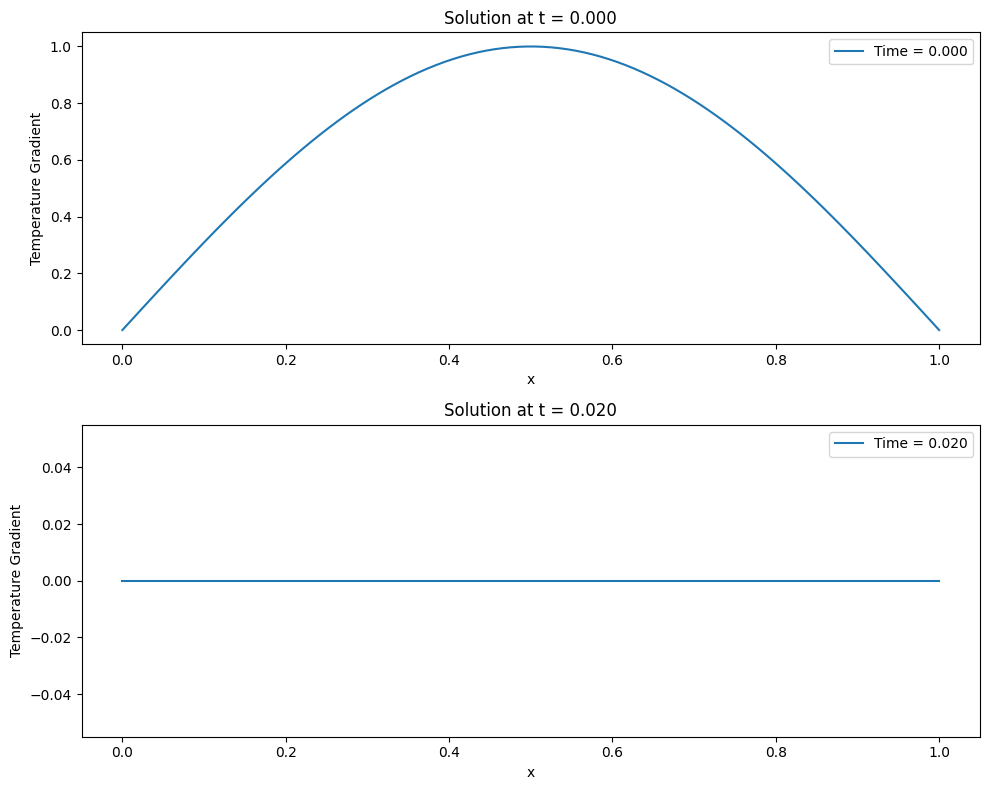

In [9]:
#Explicit Scheme Algorithm w. ∆x=1/100, w. stability criterion
#∆t/∆x^2 ≤ 1/2, using the Forward Euler's Method
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolver:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt+1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

    def set_parameters(self, dx, dt):
        self.dx = dx
        self.dt = dt

    def solve(self):
        alpha = self.dt / (self.dx**2)
        for j in range(0, self.Nt):
            for i in range(1, self.Nx-1):
                uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
                ut = self.u[i, j] + alpha * uxx
                self.u[i, j+1] = ut * self.dt

            # Enforce boundary conditions
            self.u[0, j+1] = 0
            self.u[-1, j+1] = 0

    def get_solution_at_time(self, t):
        closest_time_step = int(t / self.T * self.Nt)
        return self.u[:, closest_time_step]

    def find_smooth_and_linear_times(self):
        curvature = np.zeros(self.Nt)
        for j in range(1, self.Nt):
            curvature[j] = np.max(np.abs(np.gradient(np.gradient(self.u[:, j], self.dx), self.dx)))

        t1 = np.argmax(curvature > 0.01 * np.max(curvature)) * self.dt
        t2 = np.argmax(curvature < 0.01 * np.max(curvature)) * self.dt

        return t1, t2

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt+1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

# Usage
solver = HeatEquationSolver(L=1.0, T=0.1, Nx=100, Nt=1000)
solver.set_parameters(dx=1/100, dt=0.0001)  # Adjust as needed

# Find times for smooth and linear solutions
t1, t2 = solver.find_smooth_and_linear_times()

# Ensure t2 > t1 and set t2 to be close to the end of the simulation
t2 = min(t2 + 0.02, solver.T)

# Get solutions at time points t1 and t2
solution_t1 = solver.get_solution_at_time(t1)
solution_t2 = solver.get_solution_at_time(t2)

# Plot the solutions
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(solver.x, solution_t1, label=f'Time = {t1:.3f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Temperature Gradient')
axes[0].set_title(f'Solution at t = {t1:.3f}')
axes[0].legend()

axes[1].plot(solver.x, solution_t2, label=f'Time = {t2:.3f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Temperature Gradient')
axes[1].set_title(f'Solution at t = {t2:.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()

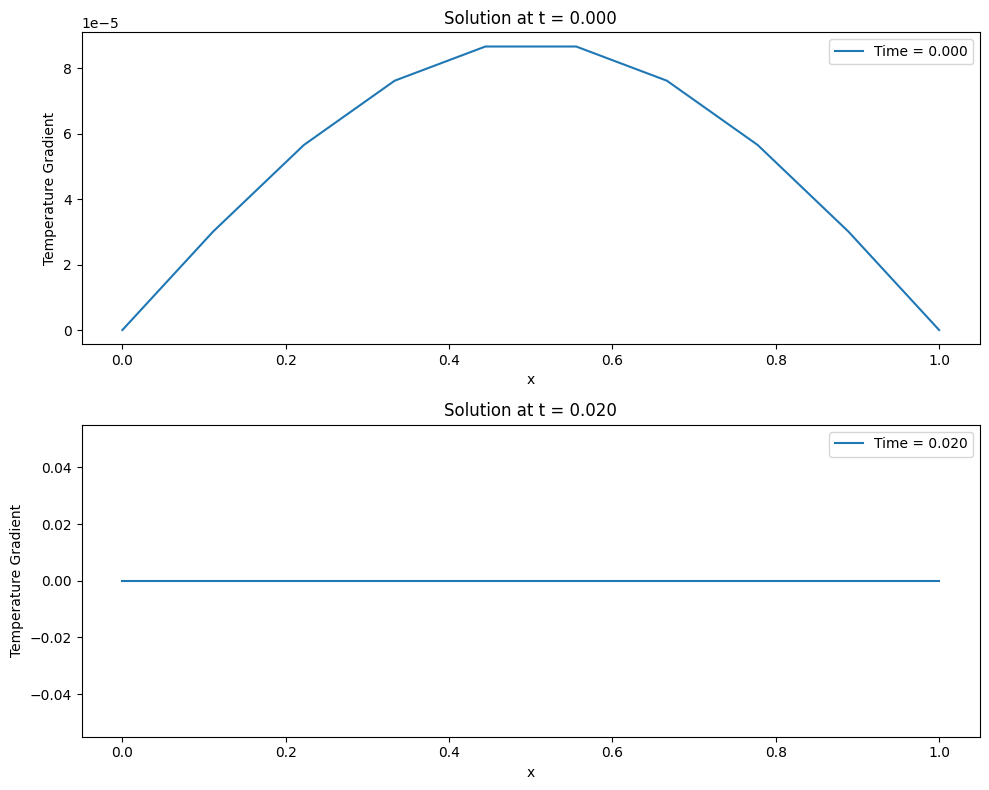

In [10]:
#Explicit Scheme Algorithm w. ∆x=1/10, w. stability criterion
#∆t/∆x^2 ≤ 1/2, using the Forward Euler's Method
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolver:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt+1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

    def set_parameters(self, dx, dt):
        self.dx = dx
        self.dt = dt

    def solve(self):
        alpha = self.dt / (self.dx**2)
        for j in range(0, self.Nt):
            for i in range(1, self.Nx-1):
                uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
                ut = self.u[i, j] + alpha * uxx
                self.u[i, j+1] = ut * self.dt

            # Enforce boundary conditions
            self.u[0, j+1] = 0
            self.u[-1, j+1] = 0

    def get_solution_at_time(self, t):
        closest_time_step = int(t / self.T * self.Nt)
        return self.u[:, closest_time_step]

    def find_smooth_and_linear_times(self):
        curvature = np.zeros(self.Nt)
        for j in range(1, self.Nt):
            curvature[j] = np.max(np.abs(np.gradient(np.gradient(self.u[:, j], self.dx), self.dx)))

        t1 = np.argmax(curvature > 0.01 * np.max(curvature)) * self.dt
        t2 = np.argmax(curvature < 0.01 * np.max(curvature)) * self.dt

        return t1, t2

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt+1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

solver = HeatEquationSolver(L=1.0, T=0.1, Nx=10, Nt=1000)  # Adjust Nx as needed
solver.set_parameters(dx=1/10, dt=0.0001)  # Adjust dx and dt as needed
solver.solve()

# Find times for smooth and linear solutions
t1, t2 = solver.find_smooth_and_linear_times()

# Ensure t2 > t1 and set t2 to be close to the end of the simulation
t2 = min(t2 + 0.02, solver.T)

# Get solutions at time points t1 and t2
solution_t1 = solver.get_solution_at_time(t1)
solution_t2 = solver.get_solution_at_time(t2)

# Plot the solutions
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(solver.x, solution_t1, label=f'Time = {t1:.3f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Temperature Gradient')
axes[0].set_title(f'Solution at t = {t1:.3f}')
axes[0].legend()

axes[1].plot(solver.x, solution_t2, label=f'Time = {t2:.3f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Temperature Gradient')
axes[1].set_title(f'Solution at t = {t2:.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()

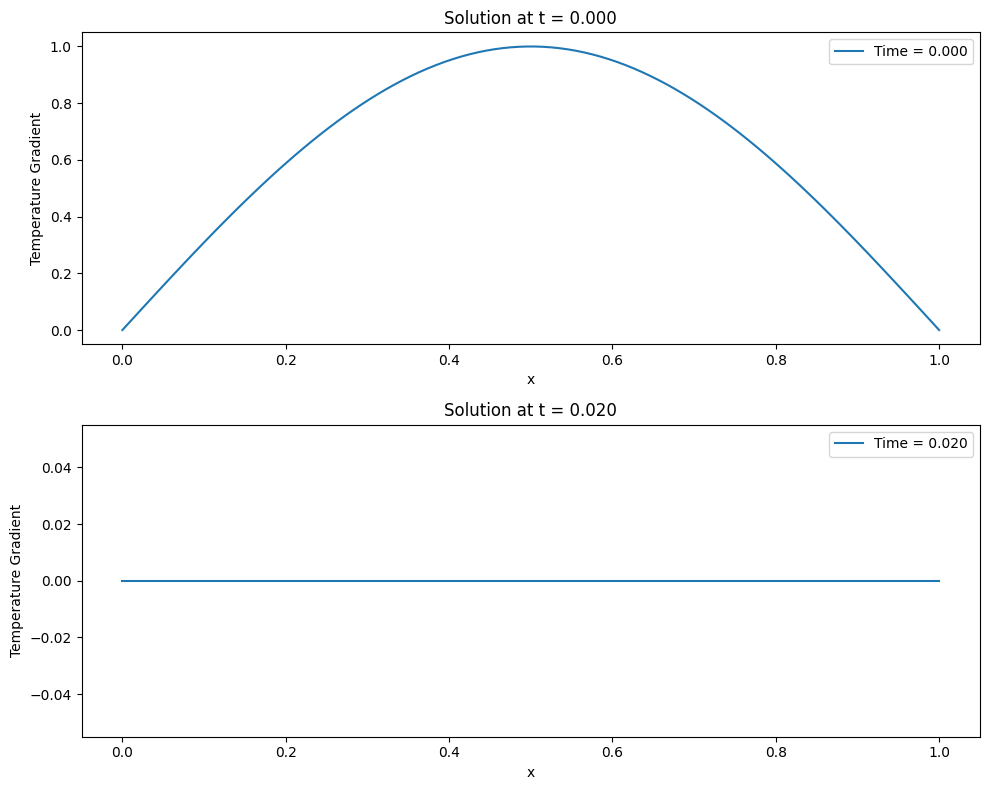

In [14]:
#Explicit Scheme Algorithm w. ∆x=1/100, w. stability criterion
#∆t/∆x^2 ≤ 1/2, using the Implicit Euler's Method:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolverImplicit:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt + 1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Implicit method parameter
        self.alpha = self.dt / (self.dx**2)

    def set_parameters(self, dx, dt):
        self.dx = dx
        self.dt = dt
        self.alpha = dt / (dx**2)

    def solve(self):
        for j in range(0, self.Nt):
            for i in range(1, self.Nx - 1):
                rhs = self.u[i, j] + 0.5 * self.alpha * (self.u[i + 1, j] - 2 * self.u[i, j] + self.u[i - 1, j])
                self.u[i, j + 1] = rhs / (1 + self.alpha)

            # Enforce boundary conditions
            self.u[0, j + 1] = 0
            self.u[-1, j + 1] = 0

    def get_solution_at_time(self, t):
        closest_time_step = int(t / self.T * self.Nt)
        return self.u[:, closest_time_step]

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt + 1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

# Usage
solver = HeatEquationSolverImplicit(L=1.0, T=0.1, Nx=100, Nt=1000)
solver.set_parameters(dx=1/100, dt=0.0001)  # Adjust as needed

# Get solutions at time points t1 and t2
solution_t1 = solver.get_solution_at_time(t1)
solution_t2 = solver.get_solution_at_time(t2)

# Plot the solutions
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(solver.x, solution_t1, label=f'Time = {t1:.3f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Temperature Gradient')
axes[0].set_title(f'Solution at t = {t1:.3f}')
axes[0].legend()

axes[1].plot(solver.x, solution_t2, label=f'Time = {t2:.3f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Temperature Gradient')
axes[1].set_title(f'Solution at t = {t2:.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()

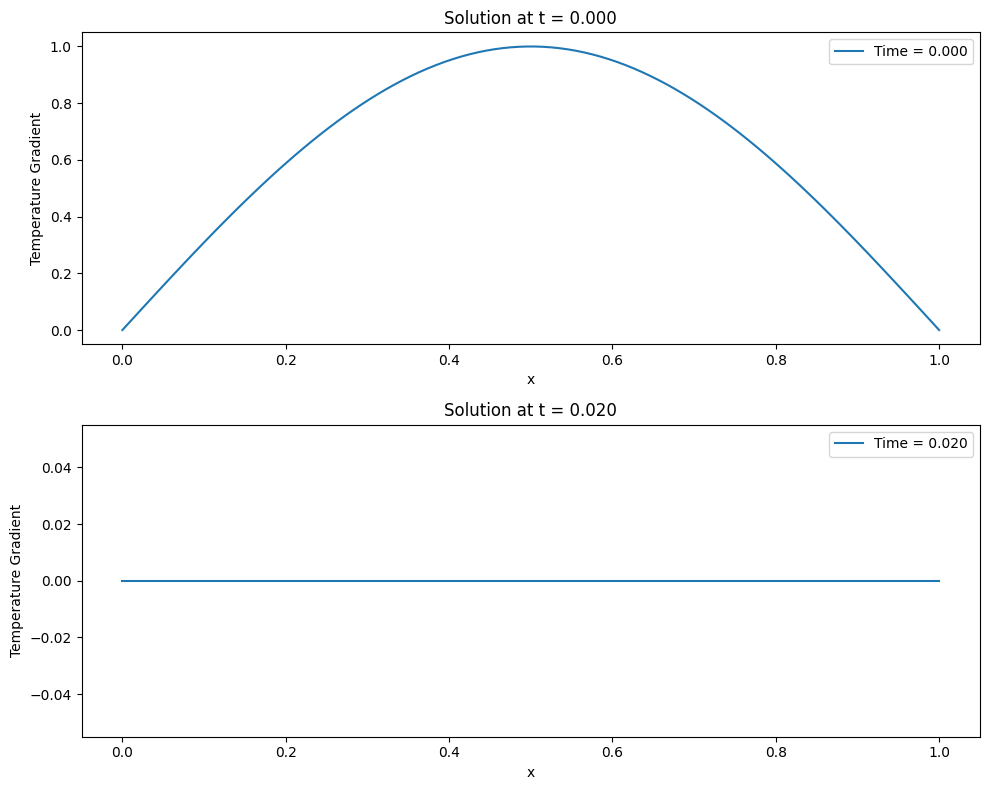

In [15]:
#Explicit Scheme Algorithm w. ∆x=1/100, w. stability criterion
#∆t/∆x^2 ≤ 1/2, using the Implicit Euler's Method:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationSolverImplicit:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt + 1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Implicit method parameter
        self.alpha = self.dt / (self.dx**2)

    def set_parameters(self, dx, dt):
        self.dx = dx
        self.dt = dt
        self.alpha = dt / (dx**2)

    def solve(self):
        for j in range(0, self.Nt):
            for i in range(1, self.Nx - 1):
                rhs = self.u[i, j] + 0.5 * self.alpha * (self.u[i + 1, j] - 2 * self.u[i, j] + self.u[i - 1, j])
                self.u[i, j + 1] = rhs / (1 + self.alpha)

            # Enforce boundary conditions
            self.u[0, j + 1] = 0
            self.u[-1, j + 1] = 0

    def get_solution_at_time(self, t):
        closest_time_step = int(t / self.T * self.Nt)
        return self.u[:, closest_time_step]

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt + 1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

# Usage
solver = HeatEquationSolverImplicit(L=1.0, T=0.1, Nx=100, Nt=1000)
solver.set_parameters(dx=1/10, dt=0.0001)  # Adjust as needed

# Get solutions at time points t1 and t2
solution_t1 = solver.get_solution_at_time(t1)
solution_t2 = solver.get_solution_at_time(t2)

# Plot the solutions
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(solver.x, solution_t1, label=f'Time = {t1:.3f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Temperature Gradient')
axes[0].set_title(f'Solution at t = {t1:.3f}')
axes[0].legend()

axes[1].plot(solver.x, solution_t2, label=f'Time = {t2:.3f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Temperature Gradient')
axes[1].set_title(f'Solution at t = {t2:.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class HeatEquationSolverImplicit:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt + 1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

    def solve(self):
        alpha = self.dt / (self.dx**2)

        for j in range(0, self.Nt):
            A_matrix = self.construct_A_matrix(alpha)
            b_vector = self.construct_b_vector(j, alpha)
            self.u[1:-1, j + 1] = np.linalg.solve(A_matrix, b_vector)

        # Enforce boundary conditions
        self.u[0, :] = 0
        self.u[-1, :] = 0

    def construct_A_matrix(self, alpha):
        main_diagonal = 1 + 2 * alpha
        off_diagonal = -alpha

        A_matrix = np.diag(main_diagonal * np.ones(self.Nx - 2)) + np.diag(off_diagonal * np.ones(self.Nx - 3), 1) + np.diag(off_diagonal * np.ones(self.Nx - 3), -1)

        return A_matrix

    def construct_b_vector(self, j, alpha):
        b_vector = self.u[1:-1, j] + alpha * (self.u[2:, j] - 2 * self.u[1:-1, j] + self.u[:-2, j])
        b_vector[0] += alpha * self.u[0, j]
        b_vector[-1] += alpha * self.u[-1, j]

        return b_vector

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt + 1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title("Temperature Gradient in a Rod over Time (Implicit Euler's Method)")
        plt.show()

class HeatEquationSolver:
    def __init__(self, L, T, Nx, Nt):
        self.L = L
        self.T = T
        self.Nx = Nx
        self.Nt = Nt

        # Discretization
        self.dx = L / (Nx - 1)
        self.dt = T / Nt

        # Initialize solution matrix
        self.u = np.zeros((Nx, Nt+1))

        # Set initial condition
        self.x0 = 0
        self.x = np.linspace(self.x0, L, Nx)
        self.u[:, 0] = np.sin(np.pi * self.x)

    def solve(self):
        alpha = self.dt / (self.dx**2)
        for j in range(0, self.Nt):
            for i in range(1, self.Nx-1):
                uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
                ut = self.u[i, j] + alpha * uxx * self.dt  # Fix: Multiply by self.dt
                self.u[i, j+1] = ut

            # Enforce boundary conditions
            self.u[0, j+1] = 0
            self.u[-1, j+1] = 0

    def plot_solution(self):
        X, T = np.meshgrid(self.x, np.linspace(0, self.T, self.Nt+1))
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, self.u.T, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('Temperature Gradient')
        ax.set_title('Temperature Gradient in a Rod over Time')
        plt.show()

# Create instances of the solvers
solver_implicit = HeatEquationSolverImplicit(L=1.0, T=0.1, Nx=100, Nt=1000)
solver_explicit = HeatEquationSolver(L=1.0, T=0.1, Nx=100, Nt=1000)

# Solve the equations
solver_implicit.solve()
solver_explicit.solve()

# Extract relevant information for the comparison
time_values = np.linspace(0, solver_implicit.T, solver_implicit.Nt + 1)
x_values = solver_implicit.x
temperature_gradient_implicit = solver_implicit.u[:, :].T
temperature_gradient_explicit = solver_explicit.u[:, :].T

# Create a DataFrame for the comparison
data = {
    'Time': np.repeat(time_values, len(x_values)),
    'X': np.tile(x_values, len(time_values)),
    'Temperature Gradient Implicit': temperature_gradient_implicit.flatten(),
    'Temperature Gradient Explicit': temperature_gradient_explicit.flatten(),
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# To export the DataFrame to a CSV file
df.to_csv('heat_equation_comparison.csv', index=False)

C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_22128\4117408936.py:85: RuntimeWarning: overflow encountered in scalar divide
  uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2
C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_22128\4117408936.py:86: RuntimeWarning: invalid value encountered in scalar add
  ut = self.u[i, j] + alpha * uxx * self.dt  # Fix: Multiply by self.dt
C:\Users\Kjæreng\AppData\Local\Temp\ipykernel_22128\4117408936.py:85: RuntimeWarning: invalid value encountered in scalar add
  uxx = (self.u[i+1, j] - 2*self.u[i, j] + self.u[i-1, j]) / self.dx**2


        Time         X  Temperature Gradient Implicit  \
0        0.0  0.000000                       0.000000   
1        0.0  0.010101                       0.031728   
2        0.0  0.020202                       0.063424   
3        0.0  0.030303                       0.095056   
4        0.0  0.040404                       0.126592   
...      ...       ...                            ...   
100095   0.1  0.959596                       0.017588   
100096   0.1  0.969697                       0.013207   
100097   0.1  0.979798                       0.008812   
100098   0.1  0.989899                       0.004408   
100099   0.1  1.000000                       0.000000   

        Temperature Gradient Explicit  
0                            0.000000  
1                            0.031728  
2                            0.063424  
3                            0.095056  
4                            0.126592  
...                               ...  
100095                            N